# PCA

0. Random data

In [1]:
import numpy as np

mean_ = np.array([7, 10])
cov_ = np.array([[3.5, -1], [-1, 3.5]])

org_data = np.random.multivariate_normal(mean_, cov_, size = (1000))

In [2]:
org_data

array([[ 6.56006138, 11.74137802],
       [ 5.59344428, 10.42895946],
       [ 7.49979995,  9.05399642],
       ...,
       [ 4.06612525, 10.22805357],
       [ 9.46800781, 14.39299217],
       [ 7.58822644, 15.12890642]])

1. Standardize/ Normalize data

Chọn cách mean centering

In [3]:
mean = np.mean(org_data, axis = 0)
mean

array([ 6.94180803, 10.0322431 ])

In [4]:
mean_data = org_data - mean
mean_data

array([[-0.38174665,  1.70913493],
       [-1.34836375,  0.39671637],
       [ 0.55799192, -0.97824667],
       ...,
       [-2.87568278,  0.19581048],
       [ 2.52619978,  4.36074907],
       [ 0.64641841,  5.09666332]])

2. Compute the covariance matrix

In [7]:
cov = np.cov(mean_data.T)
cov = np.round(cov, 3)
cov

array([[ 3.548, -1.041],
       [-1.041,  3.596]])

3. Compute eigenvector 

In [61]:
# np.linalg.eig
eig_values, eig_vector = np.linalg.eig(cov)
print(eig_values)
print(eig_vector)

[2.53072338 4.61327662]
[[-0.71520928  0.69891036]
 [-0.69891036 -0.71520928]]


In [63]:
for i in range(eig_values.shape[0]):

    print(f'eig value {eig_values[i]} ---- eig vector {eig_vector[:,i]}')

eig value 2.5307233796920245 ---- eig vector [-0.71520928 -0.69891036]
eig value 4.613276620307976 ---- eig vector [ 0.69891036 -0.71520928]


4. Sort 


In [64]:
# inti index
index = np.arange(0, len(eig_values), 1)

# index = ([itr for _, itr in sorted(zip(eig_values, index), reverse = True)])
index = ([itr for _, itr in sorted(zip(eig_values, index))])[::-1]
index

[1, 0]

In [65]:
#
eig_values = eig_values[index]
eig_vector = eig_vector[:, index]

In [66]:
eig_values

array([4.61327662, 2.53072338])

In [67]:
eig_vector

array([[ 0.69891036, -0.71520928],
       [-0.71520928, -0.69891036]])

5. Select K


In [68]:
sum_eig_values = np.sum(eig_values)
sum_eig_values

7.144

In [69]:
explained_variance = eig_values/ sum_eig_values


array([0.64575541, 0.35424459])

In [83]:
cumsum = np.cumsum(explained_variance)
cumsum

array([0.64575541, 1.        ])

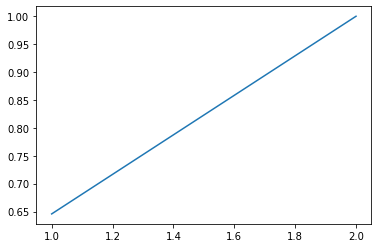

In [85]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, len(explained_variance) + 1, 1) , cumsum)

In [ ]:
# Chọn K sao cho cumsum >= 0.95
#  K = 2

In [79]:
K = 2

# 6. Transform data

In [80]:
pca_data = np.dot(mean_data, eig_vector[:,:K])
pca_data

array([[-1.48919585, -0.92150335],
       [-1.22612061,  0.68709309],
       [ 1.08963743,  0.28462573],
       ...,
       [-2.14988994,  1.91986104],
       [-1.35326102, -4.85453421],
       [-3.19339239, -4.02443522]])

In [75]:
org_data

array([[ 6.56006138, 11.74137802],
       [ 5.59344428, 10.42895946],
       [ 7.49979995,  9.05399642],
       ...,
       [ 4.06612525, 10.22805357],
       [ 9.46800781, 14.39299217],
       [ 7.58822644, 15.12890642]])

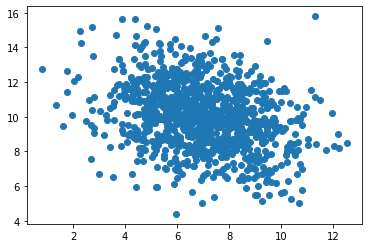

In [86]:
plt.scatter(org_data[:, 0], org_data[:, 1])

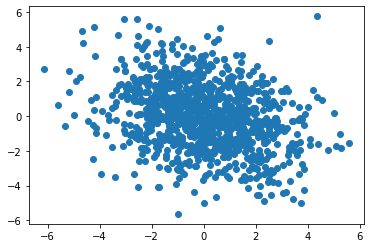

In [87]:
plt.scatter(mean_data[:, 0], mean_data[:, 1])

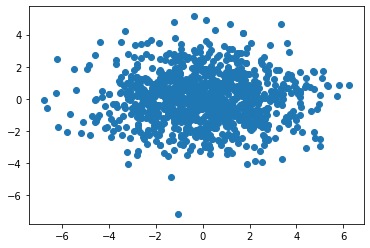

In [88]:
plt.scatter(pca_data[:, 0], pca_data[:, 1])

7. Reconstruction loss

In [78]:
# Reconstruction loss
loss = np.mean(np.square(pca_data - org_data))
loss

80.09963242412263

## Thư viện Sklearn

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca.fit_transform(org_data)

array([[ 1.48931428,  0.92131194],
       [ 1.22603229, -0.68725067],
       [-1.08967401, -0.28448568],
       ...,
       [ 2.14964316, -1.92013735],
       [ 1.35388496,  4.85436024],
       [ 3.19390962,  4.02402474]])

In [100]:
# Chọn chiều (K)
# pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)


array([0.64580514, 1.        ])

In [92]:
help(pca)

Help on PCA in module sklearn.decomposition._pca object:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |

# 